In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
%matplotlib inline

###1. Clustering

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

--2023-04-15 08:37:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  34.4MB/s    in 1.7s    

2023-04-15 08:37:30 (34.4 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



In [ ]:
%%capture
!unzip 'UCI HAR Dataset.zip'

In [ ]:
# Training data
X_train = pd.read_csv('/content/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True , header = None)
y_train = pd.read_csv('/content/UCI HAR Dataset/train/y_train.txt', header = None, names = ['Label'])

# Testing data
X_test = pd.read_csv('/content/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True , header = None)
y_test = pd.read_csv('/content/UCI HAR Dataset/test/y_test.txt', header = None, names = ['Label'])

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
%%capture
!pip uninstall umap
!pip install umap-learn

In [ ]:
len(np.unique(list(y_train['Label'])))

6

####Plotting UMAP

In [ ]:
from umap import UMAP

In [ ]:
umap_2D = UMAP(n_components=2)
projection_2d = umap_2D.fit_transform(X_train)

umap_3D = UMAP(n_components=3)
projection_3d = umap_3D.fit_transform(X_train)

In [ ]:
plot_2d = px.scatter(projection_2d, x=0, y=1, color=y_train['Label'], labels={'color': 'species'})
plot_3d = px.scatter_3d(projection_3d, x=0, y=1, z=2, color=y_train['Label'], labels={'color': 'species'})

In [ ]:
plot_2d.show()

In [ ]:
plot_3d.show()

####KMeans and Spectral Clustering

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[0.64429225, 0.48985291, 0.43354743, ..., 0.07937662, 0.79825103,
        0.47068654],
       [0.63920942, 0.49179472, 0.4382399 , ..., 0.0776062 , 0.79848665,
        0.47284164],
       [0.63982653, 0.49026642, 0.44326915, ..., 0.07553327, 0.79872236,
        0.47544109],
       ...,
       [0.63669369, 0.49149469, 0.47748909, ..., 0.11043369, 0.84506893,
        0.52040559],
       [0.64482708, 0.49057848, 0.42085971, ..., 0.10740929, 0.84323381,
        0.51266974],
       [0.67575173, 0.49378844, 0.39806642, ..., 0.10836653, 0.84348837,
        0.51834742]])

In [ ]:
# %%time
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

model_Kmeans_list1, model_Kmeans_list2 = list(), list()
scores_list1, scores_list2 = list(), list()
inertia_list1, inertia_list2 = list(), list()
for i in range(2, 11):
    model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    model_cluster = SpectralClustering(n_clusters=i, assign_labels="discretize", random_state=42)

    model.fit(X_train)
    model_cluster.fit(X_train)

    # inertia_list1.append(model.inertia_)
    # inertia_list2.append(model_cluster.inertia_)

    score1 = silhouette_score(X_train, model.labels_)
    score2 = silhouette_score(X_train, model_cluster.labels_)

    # model_Kmeans_list.append(model_Kmeans_list)
    scores_list1.append(score1)
    scores_list2.append(score2)

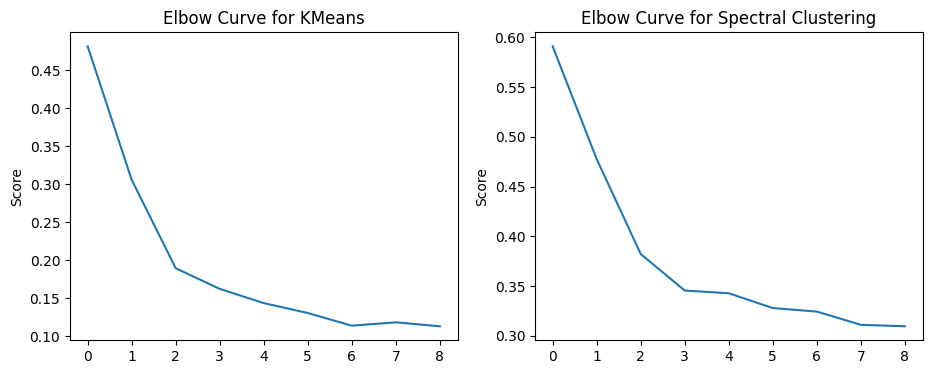

In [ ]:
# Plotting
fig = plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.title('Elbow Curve for KMeans')
plt.ylabel('# of Clusters')
plt.ylabel('Score')
plt.plot(scores_list1)

plt.subplot(1, 2, 2)
plt.title('Elbow Curve for Spectral Clustering')
plt.ylabel('# of Clusters')
plt.ylabel('Score')
plt.plot(scores_list2)

In [ ]:
print("The optimal K for KMeans is: 2")
print("The optimal K for Spectral Clustering is: 3")

The optimal K for KMeans is: 2
The optimal K for Spectral Clustering is: 3


In [ ]:
model = KMeans(n_clusters=3, n_init='auto')
model_cluster = SpectralClustering(n_clusters=3, assign_labels="discretize")
model.fit(X_train)
model_cluster.fit(X_train)

In [ ]:
# Test scores

from sklearn.metrics.cluster import adjusted_rand_score
test1 = adjusted_rand_score(model.predict(X_test).flatten(), np.array(y_test).flatten())
test2 = adjusted_rand_score(model_cluster.fit_predict(X_test).flatten(), np.array(y_test).flatten())
print(test1)
print(test2)

0.4811022921538455
0.591133462898884


###2. Random Forest

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
X = data.data
y = data.target

In [ ]:
print(X)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# df = pd.DataFrame([X, y], columns = data.feature_names)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(max_depth=2, random_state=42)
model_RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [ ]:
pred_RFC = model_RFC.predict(X_test)
print("Accuracy using Random Forest Classifier: "+str(((pred_RFC == y_test).sum())/len(y_test))+" %")

Accuracy using Random Forest Classifier: 0.9722222222222222 %


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model_Bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
model_Bagging.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
pred_Bagging = model_Bagging.predict(X_test)
print("Accuracy using Decision Tree with Bagging Classifier: "+str(((pred_Bagging == y_test).sum())/len(y_test))+" %")

Accuracy using Decision Tree with Bagging Classifier: 0.9305555555555556 %


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
model_AdaBoost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)

In [ ]:
pred_AdaBoost = model_AdaBoost.predict(X_test)
print("Accuracy using Decision Tree with AdaBoost Classifier: ", (((pred_AdaBoost == y_test).sum())/len(y_test)), " %")

Accuracy using Decision Tree with AdaBoost Classifier:  0.9305555555555556  %


In [ ]:
# inference

# Random Forest classifier worked the best with an accuracy of 0.972
# Random Forest is better tha bagging and adaboost since it can reduce overfitting
# and improve the accuracy of predictions by constructing several decision trees
# and combining their results. Bagging can help reduce variance and prevent
# overfitting while AdaBoost can perform well even with simple base models by
# adjusting the weights of samples at each iteration.

###3. Ensemble of Methods

In [ ]:
# !wget https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download&select=CAR+DETAILS+FROM+CAR+DEKHO.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/ML_dataset/assn4_dataset/CAR DETAILS FROM CAR DEKHO.csv')
df = pd.read_csv('/content/drive/MyDrive/ML_dataset/assn4_dataset/car data.csv')
y = pd.DataFrame(df['Selling_Price'])
X = df.drop(['Selling_Price'], axis=1)

In [ ]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X['Car_Name'])
X['Car_Name'] = le.transform(X['Car_Name'])

le.fit(X['Fuel_Type'])
X['Fuel_Type'] = le.transform(X['Fuel_Type'])

le.fit(X['Seller_Type'])
X['Seller_Type'] = le.transform(X['Seller_Type'])

le.fit(X['Transmission'])
X['Transmission'] = le.transform(X['Transmission'])

# le.fit(X['owner'])
# X['owner'] = le.transform(X['owner'])

In [ ]:
# X = X.drop(['name'], axis=1)

In [ ]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [ ]:
# X['transmission']+=1
# X['seller_type']+=1
# X['owner']+=1
# X['year'] = 2023 - X['year']

In [ ]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [ ]:
# print(X['transmission'].unique())
# print(X['seller_type'].unique())
# print(X['owner'].unique())

In [ ]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0


In [ ]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.77419355, 0.85714286, 0.11201563, ..., 0.        , 1.        ,
        0.        ],
       [0.46236559, 0.42857143, 0.01389341, ..., 1.        , 1.        ,
        0.        ],
       [0.64516129, 0.85714286, 0.07630522, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38709677, 0.78571429, 0.0323456 , ..., 1.        , 1.        ,
        0.33333333],
       [0.69892473, 0.57142857, 0.10344079, ..., 0.        , 1.        ,
        0.        ],
       [0.40860215, 1.        , 0.01421904, ..., 1.        , 1.        ,
        0.        ]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def ridge_regression(X, y, lamda):
    I = np.identity(np.dot(X.T, X).shape[0])
    # I[0, 0] = 0
    theta = np.dot(np.linalg.pinv(np.dot(X.T, X) + lamda*I), np.dot(X.T, y))
    return theta

k = 0.8
theta = ridge_regression(X_train, y_train, k)
y_pred_ridge = np.dot(X_test, theta)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('RMSE:', RMSE)

RMSE: 4.685267794851286


In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

y_pred_r = model_ridge.predict(X_test)
# print(y_pred_r)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_r))
print('RMSE:', RMSE)

RMSE: 4.792444260967565


In [ ]:
model_ridge.alpha

1.0

In [ ]:
print(X_test.shape)
print(y_pred.shape)
print(theta.shape)

(100, 8)
(100, 1)
(8, 1)


In [ ]:
X_train.shape

(201, 8)

In [ ]:
m,n = x_train.shape

def update_weights(X,Y,w,b,lmbda,learning_rate) :
  Y_pred = X.dot(w) + b
  dW = np.zeros(n)
  for j in range(n) :
    if w[j] > 0 :
      dW[j] = (-( 2*(X[:,j] ).dot(Y-Y_pred)) + lmbda)/m
    else :
      dW[j] = (-(2*(X[:,j] ).dot(Y-Y_pred))  - lmbda)/m

  db = -2*np.sum(Y-Y_pred) / m

  # update weights
  w -= learning_rate * dW
  b -= learning_rate * db
  return w,b

def fit(X,Y,iterations,lmbda,lr) :
  w = np.zeros(n)
  b = 0
  #gradient descent
  for i in range(iterations):
    w,b = update_weights(X,Y,w,b,lmbda,lr)
  model_lasso = Lasso(alpha=1.0)
  model_lasso.fit(X_train, y_train)

  return model_ridge.predict(X_test)

In [ ]:
model

In [ ]:
model_lasso = LassoRegressor()
model_lasso.(X_train, y_train)
pred_l = model_lasso.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, pred_l))
print('RMSE:', RMSE)

SyntaxError: ignored

In [ ]:
model_lasso = LassoRegression()
model_lasso.fit(X_train, y_train)
y_pred_l = model_lasso.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_l))
print('RMSE:', RMSE)

ValueError: ignored

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

y_pred_l = model_ridge.predict(X_test)
# print(y_pred_l)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_l))
print('RMSE:', RMSE)

RMSE: 4.792444260967565


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNNRegressor:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = np.zeros(len(X))

        for i, x in enumerate(X):
            # Calculate distances between x and all points in the training set
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

            # Find k nearest neighbors
            k_idx = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest neighbors and calculate the mean
            k_nearest_y = [self.y_train[i] for i in k_idx]
            y_pred[i] = np.mean(k_nearest_y)

        return y_pred

In [ ]:
# Train the KNN regressor on the training set
knn = KNNRegressor(k=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the mean squared error
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 7.191369080223876


In [ ]:
from scipy.sparse.linalg import cg

m,n = np.shape(X_train)

def kernel(point, X, k):
  weights = np.mat(np.eye((m)))
  for j in range(m):
    diff = point-X[j]
    temp = diff.dot(diff.T)/(-2 * k**2)
    weights[j,j] = temp
  return weights

def lwlr(X, Y, k,x_test):
  ypred = []
  for i in range(len(x_test)):
    wt = kernel(x_test[i],X,k)
    A = np.matmul(np.matmul(X.T,wt),X)
    b = np.matmul(np.matmul(X.T,wt),Y)
    theta = cg(A, b, maxiter=100000)
    ypred.append(X[i].dot(theta[0]))

  return ypred

y_pred3 = lwlr(X_train,y_train,0.1,X_test)

In [ ]:
rmse = np.sqrt(np.mean((y_pred3 - y_test)**2))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 7.418512127141795


In [ ]:
class Node:
    def __init__(self, split_feature=None, split_value=None, left=None, right=None):
        self.split_feature = split_feature
        self.split_value = split_value
        self.left = left
        self.right = right

class RegressionDecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            node = self.root
            while node.left:
                if X[i, node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            y_pred[i] = node.split_value
        return y_pred

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape

        # Check stopping criteria
        if n_samples < self.min_samples_split or depth == self.max_depth:
            return Node(split_value=np.mean(y))

        # Select the best feature and split value
        best_feature, best_value, best_mse = None, None, float('inf')
        for feature in range(n_features):
            feature_values = X[:, feature]
            for value in feature_values:
                left_indices = X[:, feature] <= value
                right_indices = X[:, feature] > value
                if len(y[left_indices]) > 0 and len(y[right_indices]) > 0:
                    y_left = y[left_indices]
                    y_right = y[right_indices]
                    mse = np.mean((y_left - np.mean(y_left))**2) + np.mean((y_right - np.mean(y_right))**2)
                    if mse < best_mse:
                        best_feature = feature
                        best_value = value
                        best_mse = mse

        # Split the data and recursively build the tree
        left_indices = X[:, best_feature] <= best_value
        right_indices = X[:, best_feature] > best_value
        left = self._build_tree(X[left_indices], y[left_indices], depth+1)
        right = self._build_tree(X[right_indices], y[right_indices], depth+1)
        return Node(best_feature, best_value, left, right)

In [ ]:
RDT = RegressionDecisionTree()
RDT.fit(X_train, y_train)

In [ ]:
y_pred_DT = RDT.predict(X_test)
rmse = np.sqrt(np.mean((y_pred_DT - y_test)**2))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 13.056790653558421


In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def ensemble(X_train, y_train, X_test, y_test):
    model1 = Lasso(alpha=0.1)
    model2 = Ridge(alpha=0.1)
    model3 = KNeighborsRegressor(n_neighbors=5)
    model4 = DecisionTreeRegressor(max_depth=5)

    model1.fit(X_train, y_train)
    model2.fit(X_train, y_train)
    model3.fit(X_train, y_train)
    model4.fit(X_train, y_train)

    pred1 = model1.predict(X_test)
    pred2 = model2.predict(X_test)
    pred3 = model3.predict(X_test)
    pred4 = model4.predict(X_test)

    MSE1 = mean_squared_error(y_test, pred1)
    MSE2 = mean_squared_error(y_test, pred2)
    MSE3 = mean_squared_error(y_test, pred3)
    MSE4 = mean_squared_error(y_test, pred4)
    # print(MSE1)
    pred_avg = ((pred1.flatten() + pred2.flatten() + pred3.flatten() + pred4.flatten())/4)
    return pred_avg

fin = ensemble(X_train, y_train, X_test, y_test)
print(mean_squared_error(y_test, fin))

30.304492423794464


In [ ]:
model = BaggingRegressor()
model.fit(X_train, y_train)

NameError: ignored

In [ ]:
pred_ensemble = model.predict(X_test)
print(pred_ensemble)
RMSE = np.sqrt(mean_squared_error(y_test, pred_ensemble))
print('RMSE:', RMSE)

ValueError: ignored

###4. Decision Trees

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

--2023-04-15 04:38:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K   850KB/s    in 0.7s    

2023-04-15 04:38:53 (850 KB/s) - ‘bank.zip’ saved [579043/579043]



In [ ]:
!unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [ ]:
df_bank = pd.read_csv('bank.csv', delimiter=';')

In [ ]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df_bank.columns:
    if df_bank[column].dtype == type(object):
        df_bank[column] = le.fit_transform(df_bank[column])

In [ ]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [ ]:
df_y = pd.DataFrame(df_bank['y'])
df_X = df_bank.drop(['y'], axis=1)

In [ ]:
df_y

,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dict_id3 = {'ccp_alpha':[],
          'Testing accuracy': [],
          'Training accuracy': []}
alpha_list, accuracy_train_list, accuracy_test_list = list(), list(), list()

i = 0.000
while(i<0.040):
    id3 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=i)
    id3.fit(X_train, y_train)

    y_pred = id3.predict(X_test)
    y_pred_train = id3.predict(X_train)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list.append(i)
    accuracy_test_list.append(accuracy)
    accuracy_train_list.append(accuracy2)

    # print('For ccp_alpha: ', i)
    # print('Testing Accuracy:', accuracy)
    # print('Training Accuracy:', accuracy2)
    # print('\n')
    i+=0.002
dict_id3['ccp_alpha'] = alpha_list
dict_id3['Testing accuracy'] = accuracy_test_list
dict_id3['Training accuracy'] = accuracy_train_list

In [ ]:
df_id3 = pd.DataFrame(dict_id3)

In [ ]:
idx1 = np.argmin(np.array(abs(df_id3['Testing accuracy'] - df_id3['Training accuracy']))) - 1

In [ ]:
optimal_alpha1 = df_id3['ccp_alpha'][idx1]
optimal_alpha1

0.004

In [ ]:
pd.DataFrame(dict_id3)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000,0.868091,1.000000
1,0.002,0.893147,0.918774
2,0.004,0.896094,0.895386
3,0.006,0.894620,0.895070
4,0.008,0.894620,0.895070
5,0.010,0.894620,0.895070
6,0.012,0.894620,0.895070
7,0.014,0.887251,0.884008
8,0.016,0.887251,0.884008
9,0.018,0.887251,0.884008


In [ ]:
dict_c45 = {'ccp_alpha':[],
          'Testing accuracy': [],
          'Training accuracy': []}
alpha_list2, accuracy_train_list2, accuracy_test_list2 = list(), list(), list()

i = 0.000
while(i<0.040):
    # Create and fit the C4.5 decision tree classifier
    c45 = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=2, min_samples_leaf=1)
    c45.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = c45.predict(X_test)
    y_pred_train = c45.predict(X_train)

    # Evaluate the performance of the model using accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list2.append(i)
    accuracy_test_list2.append(accuracy)
    accuracy_train_list2.append(accuracy2)
    # print('For ccp_alpha: ', i)
    # print('Testing Accuracy:', accuracy)
    # print('Training Accuracy:', accuracy2)
    # print('\n')
    i+=0.002
dict_c45['ccp_alpha'] = alpha_list2
dict_c45['Testing accuracy'] = accuracy_test_list2
dict_c45['Training accuracy'] = accuracy_train_list2

In [ ]:
df_c45 = pd.DataFrame(dict_c45)

In [ ]:
idx2 = np.argmin(np.array(abs(df_c45['Testing accuracy'] - df_c45['Training accuracy']))) - 1

In [ ]:
optimal_alpha2 = df_c45['ccp_alpha'][idx2]
optimal_alpha2

0.016

In [ ]:
pd.DataFrame(dict_c45)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000,0.872513,1.0
1,0.002,0.868828,1.0
2,0.004,0.868828,1.0
3,0.006,0.868828,1.0
4,0.008,0.865881,1.0
5,0.010,0.868828,1.0
6,0.012,0.869565,1.0
7,0.014,0.865881,1.0
8,0.016,0.873987,1.0
9,0.018,0.876934,1.0


In [ ]:
dict_c50 = {'ccp_alpha':[],
          'Testing accuracy': [],
          'Training accuracy': []}
alpha_list3, accuracy_train_list3, accuracy_test_list3 = list(), list(), list()

i = 0.000
while(i<0.040):
    # Create and fit the C5.0 decision tree classifier
    c50 = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                splitter="best")
    c50.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = c50.predict(X_test)
    y_pred_train = c50.predict(X_train)

    # Evaluate the performance of the model using accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list3.append(i)
    accuracy_test_list3.append(accuracy)
    accuracy_train_list3.append(accuracy2)
    # print('For ccp_alpha: ', i)
    # print('Testing Accuracy:', accuracy)
    # print('Training Accuracy:', accuracy2)
    # print('\n')
    i+=0.002
dict_c50['ccp_alpha'] = alpha_list3
dict_c50['Testing accuracy'] = accuracy_test_list3
dict_c50['Training accuracy'] = accuracy_train_list3

In [ ]:
df_c50 = pd.DataFrame(dict_c50)

In [ ]:
idx3 = np.argmin(np.array(abs(df_c50['Testing accuracy'] - df_c50['Training accuracy']))) - 1

In [ ]:
optimal_alpha3 = df_c50['ccp_alpha'][idx3]
optimal_alpha3

0.020000000000000004

In [ ]:
pd.DataFrame(dict_c50)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000,0.865881,1.0
1,0.002,0.869565,1.0
2,0.004,0.869565,1.0
3,0.006,0.865144,1.0
4,0.008,0.872513,1.0
5,0.010,0.868828,1.0
6,0.012,0.862196,1.0
7,0.014,0.865881,1.0
8,0.016,0.863670,1.0
9,0.018,0.868828,1.0


In [ ]:
dict_CART = {'ccp_alpha':[],
          'Testing accuracy': [],
          'Training accuracy': []}
alpha_list4, accuracy_train_list4, accuracy_test_list4 = list(), list(), list()

i = 0.000
while(i<0.040):
    CART = DecisionTreeClassifier(criterion='gini')
    CART.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = CART.predict(X_test)
    y_pred_train = CART.predict(X_train)

    # Evaluate the performance of the model using accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list4.append(i)
    accuracy_test_list4.append(accuracy)
    accuracy_train_list4.append(accuracy2)
    # print('For ccp_alpha: ', i)
    # print('Testing Accuracy:', accuracy)
    # print('Training Accuracy:', accuracy2)
    # print('\n')
    i+=0.002
dict_CART['ccp_alpha'] = alpha_list4
dict_CART['Testing accuracy'] = accuracy_test_list4
dict_CART['Training accuracy'] = accuracy_train_list4

In [ ]:
df_CART = pd.DataFrame(dict_CART)

In [ ]:
idx4 = np.argmin(np.array(abs(df_CART['Testing accuracy'] - df_CART['Training accuracy']))) - 1

In [ ]:
optimal_alpha4 = df_CART['ccp_alpha'][idx4]
optimal_alpha4

0.024000000000000007

In [ ]:
pd.DataFrame(dict_CART)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000,0.859248,1.0
1,0.002,0.856301,1.0
2,0.004,0.851142,1.0
3,0.006,0.857038,1.0
4,0.008,0.853353,1.0
5,0.010,0.858511,1.0
6,0.012,0.860722,1.0
7,0.014,0.854827,1.0
8,0.016,0.852616,1.0
9,0.018,0.856301,1.0


In [ ]:
res1 = id3.cost_complexity_pruning_path(X_train, y_train)
res2 = c45.cost_complexity_pruning_path(X_train, y_train)
res3 = c50.cost_complexity_pruning_path(X_train, y_train)
res4 = CART.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
arr_ccp_alpha_id3 = res1['ccp_alphas']
arr_ccp_alpha_c45 = res2['ccp_alphas']
arr_ccp_alpha_c50 = res3['ccp_alphas']
arr_ccp_alpha_CART = res4['ccp_alphas']

#####ID3 after cost pruning

In [ ]:
dict_id3_new = {'ccp_alpha':[],
        'Testing accuracy': [],
        'Training accuracy': []}
alpha_list_new, accuracy_train_list_new, accuracy_test_list_new = list(), list(), list()

for alpha in arr_ccp_alpha_id3:

    id3_new = DecisionTreeClassifier(criterion='entropy', ccp_alpha=alpha)
    id3_new.fit(X_train, y_train)

    y_pred = id3_new.predict(X_test)
    y_pred_train = id3_new.predict(X_train)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list_new.append(alpha)
    accuracy_test_list_new.append(accuracy)
    accuracy_train_list_new.append(accuracy2)

dict_id3_new['ccp_alpha'] = alpha_list_new
dict_id3_new['Testing accuracy'] = accuracy_test_list_new
dict_id3_new['Training accuracy'] = accuracy_train_list_new

In [ ]:
df_id3_new = pd.DataFrame(dict_id3_new)

In [ ]:
idx_id3 = np.argmin(np.array(abs(df_id3_new['Testing accuracy'] - df_id3_new['Training accuracy']))) - 1

In [ ]:
optimal_alpha_id3 = df_id3_new['ccp_alpha'][idx_id3]
optimal_alpha_id3

0.0031605562579013905

In [ ]:
pd.DataFrame(dict_id3_new)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000000,0.866618,1.000000
1,0.000632,0.868828,0.998420
2,0.000632,0.868828,0.998104
3,0.000632,0.870302,0.998420
4,0.000632,0.870302,0.997472
...,...,...,...
151,0.007748,0.894620,0.895070
152,0.012935,0.887251,0.884008
153,0.018798,0.887251,0.884008
154,0.025517,0.887988,0.883375


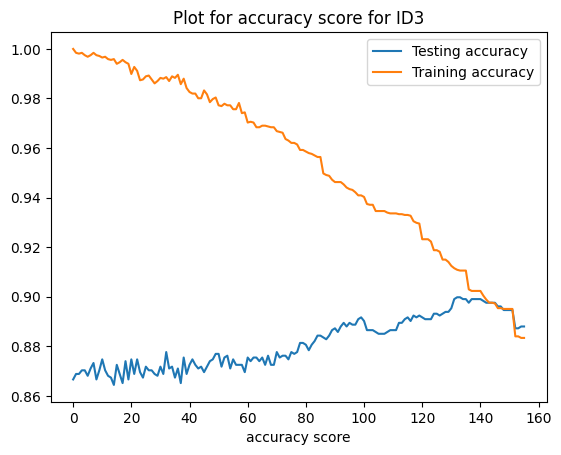

In [ ]:
plt.plot(dict_id3_new['Testing accuracy'], label='Testing accuracy')
plt.plot(dict_id3_new['Training accuracy'], label='Training accuracy')
plt.xlabel('alpha')
plt.xlabel('accuracy score')
plt.title('Plot for accuracy score for ID3')
plt.legend()

#####C45 after cost pruning

In [ ]:
dict_c45_new = {'ccp_alpha':[],
        'Testing accuracy': [],
        'Training accuracy': []}
alpha_list_new2, accuracy_train_list_new2, accuracy_test_list_new2 = list(), list(), list()

for alpha in arr_ccp_alpha_c45:

    c45_new = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=2, min_samples_leaf=1)
    c45_new.fit(X_train, y_train)

    y_pred = c45_new.predict(X_test)
    y_pred_train = c45_new.predict(X_train)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list_new2.append(alpha)
    accuracy_train_list_new2.append(accuracy)
    accuracy_test_list_new2.append(accuracy2)

dict_c45_new['ccp_alpha'] = alpha_list_new2
dict_c45_new['Testing accuracy'] = accuracy_train_list_new2
dict_c45_new['Training accuracy'] = accuracy_test_list_new2

In [ ]:
df_c45_new = pd.DataFrame(dict_c45_new)

In [ ]:
idx_c45 = np.argmin(np.array(abs(df_c45_new['Testing accuracy'] - df_c45_new['Training accuracy']))) - 1

In [ ]:
optimal_alpha_c45 = df_c45_new['ccp_alpha'][idx_c45]
optimal_alpha_c45

0.0008706976934777082

In [ ]:
pd.DataFrame(dict_c45_new)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000000,0.871039,1.0
1,0.000632,0.870302,1.0
2,0.000632,0.869565,1.0
3,0.000632,0.870302,1.0
4,0.000632,0.871039,1.0
...,...,...,...
149,0.007748,0.865881,1.0
150,0.012935,0.871776,1.0
151,0.018798,0.872513,1.0
152,0.025517,0.865144,1.0


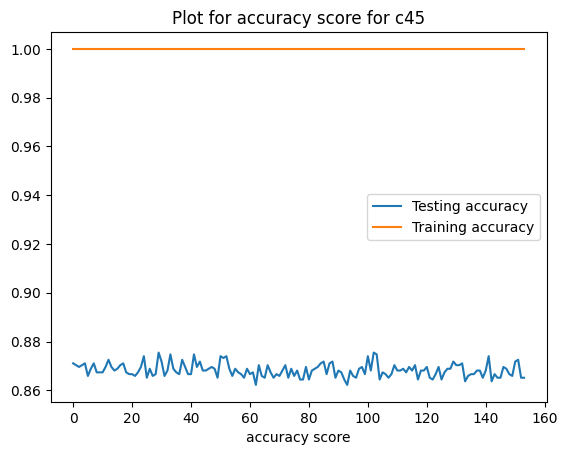

In [ ]:
plt.plot(dict_c45_new['Testing accuracy'], label='Testing accuracy')
plt.plot(dict_c45_new['Training accuracy'], label='Training accuracy')
plt.xlabel('alpha')
plt.xlabel('accuracy score')
plt.title('Plot for accuracy score for c45')
plt.legend()

#####C50 after cost pruning

In [ ]:
dict_c50_new = {'ccp_alpha':[],
        'Testing accuracy': [],
        'Training accuracy': []}
alpha_list_new3, accuracy_train_list_new3, accuracy_test_list_new3 = list(), list(), list()

for alpha in arr_ccp_alpha_c50:

    c50_new = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=2, min_samples_leaf=1, splitter="best")
    c50_new.fit(X_train, y_train)

    y_pred = c50_new.predict(X_test)
    y_pred_train = c50_new.predict(X_train)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list_new3.append(alpha)
    accuracy_train_list_new3.append(accuracy)
    accuracy_test_list_new3.append(accuracy2)

dict_c50_new['ccp_alpha'] = alpha_list_new3
dict_c50_new['Testing accuracy'] = accuracy_train_list_new3
dict_c50_new['Training accuracy'] = accuracy_test_list_new3

In [ ]:
df_c50_new = pd.DataFrame(dict_c50_new)

In [ ]:
idx_c50 = np.argmin(np.array(abs(df_c50_new['Testing accuracy'] - df_c50_new['Training accuracy']))) - 1

In [ ]:
optimal_alpha_c50 = df_c50_new['ccp_alpha'][idx_c50]
optimal_alpha_c50

0.0007671859943541946

In [ ]:
pd.DataFrame(dict_c50_new)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000000,0.860722,1.0
1,0.000632,0.867354,1.0
2,0.000632,0.863670,1.0
3,0.000632,0.868091,1.0
4,0.000632,0.868091,1.0
...,...,...,...
148,0.007748,0.865881,1.0
149,0.012935,0.866618,1.0
150,0.018798,0.872513,1.0
151,0.025517,0.862933,1.0


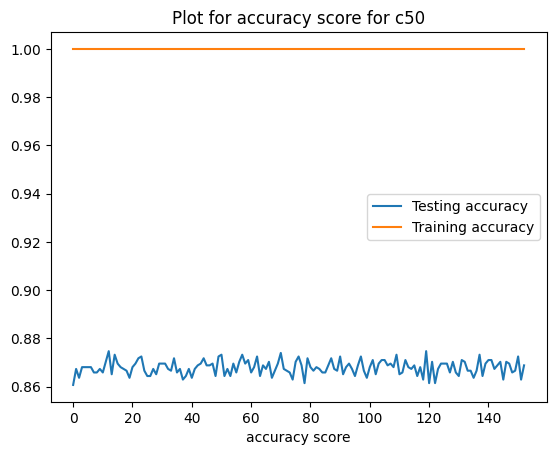

In [ ]:
plt.plot(dict_c50_new['Testing accuracy'], label='Testing accuracy')
plt.plot(dict_c50_new['Training accuracy'], label='Training accuracy')
plt.xlabel('alpha')
plt.xlabel('accuracy score')
plt.title('Plot for accuracy score for c50')
plt.legend()

#####CART after cost pruning

In [ ]:
dict_CART_new = {'ccp_alpha':[],
        'Testing accuracy': [],
        'Training accuracy': []}
alpha_list_new4, accuracy_train_list_new4, accuracy_test_list_new4 = list(), list(), list()

for alpha in arr_ccp_alpha_CART:

    CART_new = DecisionTreeClassifier(criterion='gini')
    CART_new.fit(X_train, y_train)

    y_pred = CART_new.predict(X_test)
    y_pred_train = CART_new.predict(X_train)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_train, y_pred_train)

    alpha_list_new4.append(alpha)
    accuracy_train_list_new4.append(accuracy)
    accuracy_test_list_new4.append(accuracy2)

dict_CART_new['ccp_alpha'] = alpha_list_new4
dict_CART_new['Testing accuracy'] = accuracy_train_list_new4
dict_CART_new['Training accuracy'] = accuracy_test_list_new4

In [ ]:
pd.DataFrame(dict_CART_new)

,ccp_alpha,Testing accuracy,Training accuracy
0,0.000000,0.857775,1.0
1,0.000157,0.856301,1.0
2,0.000206,0.852616,1.0
3,0.000207,0.855564,1.0
4,0.000210,0.854090,1.0
...,...,...,...
132,0.003228,0.855564,1.0
133,0.003419,0.864407,1.0
134,0.007117,0.855564,1.0
135,0.007738,0.854090,1.0


In [ ]:
df_Cart_new = pd.DataFrame(dict_CART_new)

In [ ]:
idx_cart = np.argmin(np.array(abs(df_Cart_new['Testing accuracy'] - df_Cart_new['Training accuracy']))) - 1

In [ ]:
optimal_alpha_CART = df_Cart_new['ccp_alpha'][idx_cart]
optimal_alpha_CART

0.0005899705014749264

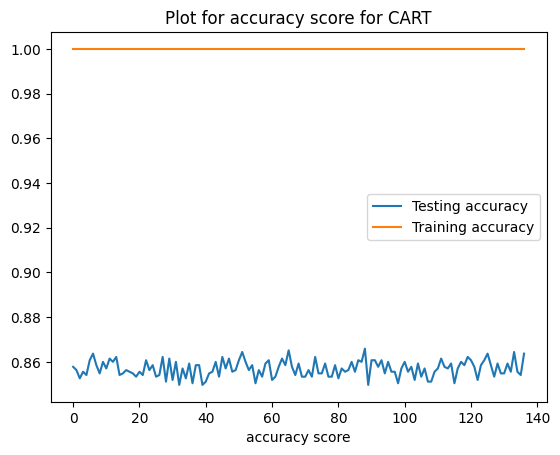

In [ ]:
plt.plot(dict_CART_new['Testing accuracy'], label='Testing accuracy')
plt.plot(dict_CART_new['Training accuracy'], label='Training accuracy')
plt.xlabel('alpha')
plt.xlabel('accuracy score')
plt.title('Plot for accuracy score for CART')
plt.legend()

In [ ]:
# We can see that the optimal alphas for self-defined ccp_alpha and using
# cost_pruning are different for c45, c50 and CART decision trees, this might be
# because of the inbuilt library using different method to initalise alphas